In [1]:
import pandas as pd

In [5]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Advertising Project\Advertising.csv')
df.head()    

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# checking dimentionality
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
# no missing values in features
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

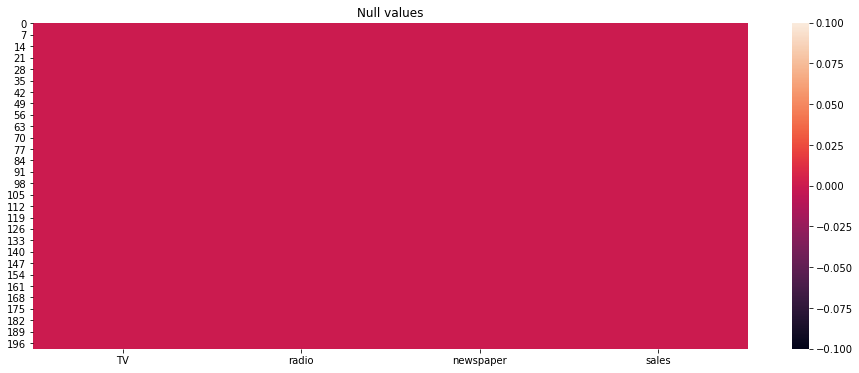

In [31]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

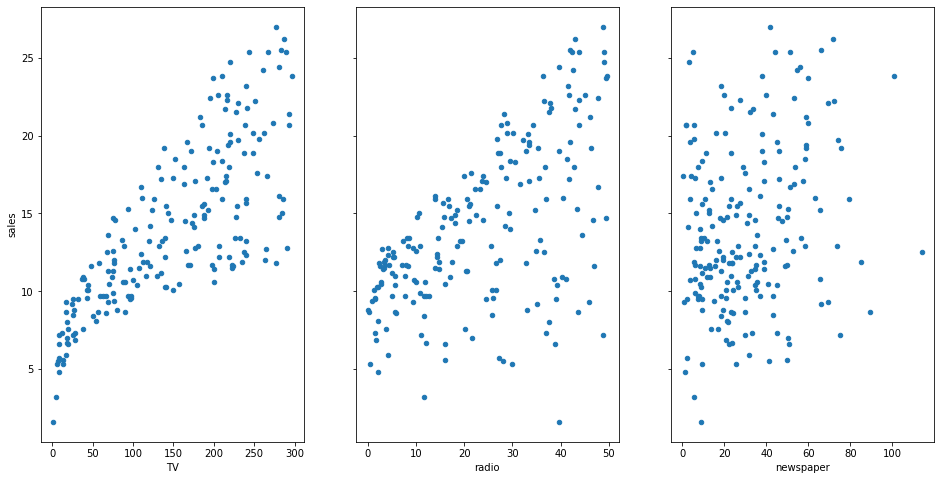

In [20]:
fig,axe=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axe[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axe[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axe[2])
fig.savefig('testdata.jpg')

In [24]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# std is high for TV,radio,newspaper
# min value is zero for radio
# diff between min and max high for TV,radio,newspaper

In [26]:
# popping
df=df.drop(columns=['Unnamed: 0'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

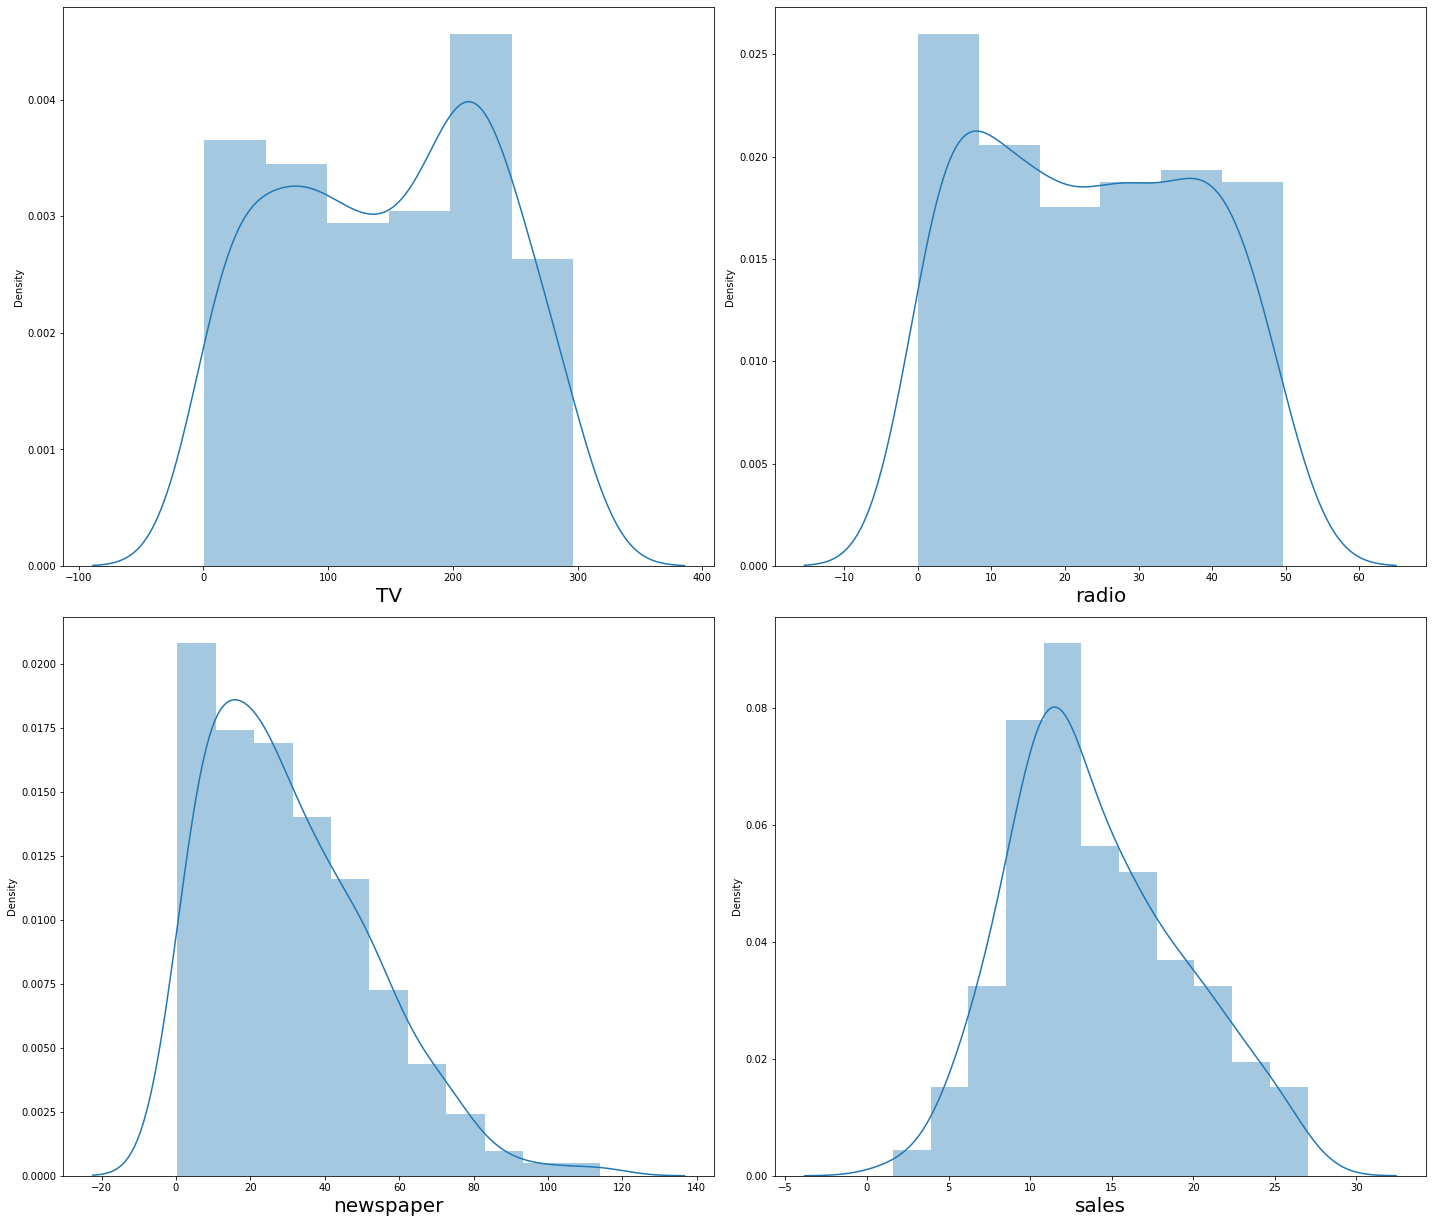

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()   

In [ ]:
# dataset into features and label

In [52]:
y=df['sales']
x=df.drop(columns=['sales'])

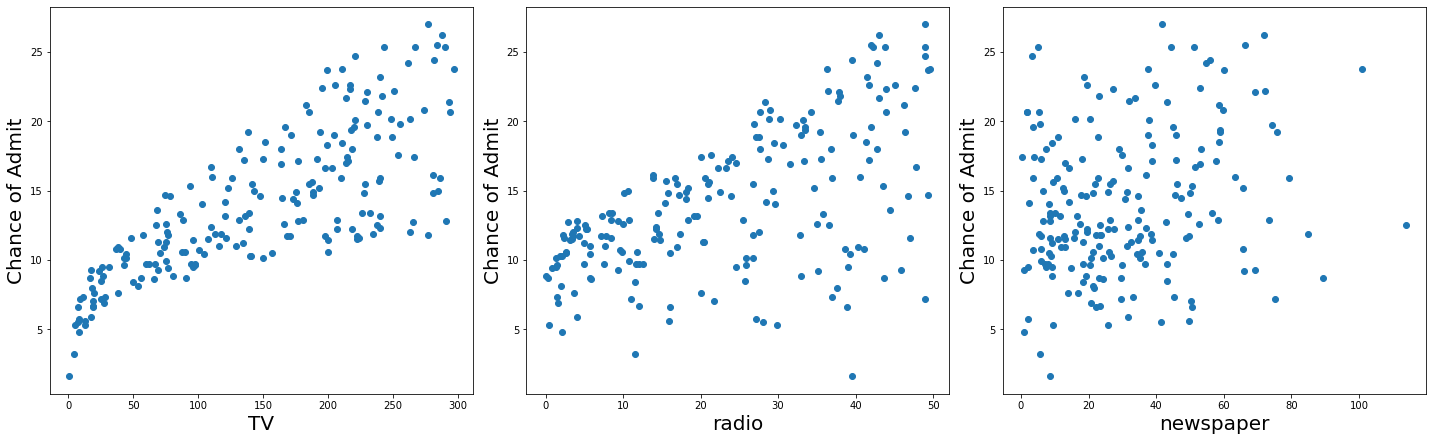

In [30]:
# Visualizing relationship



plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# It seems to be strong relation between feature and output 

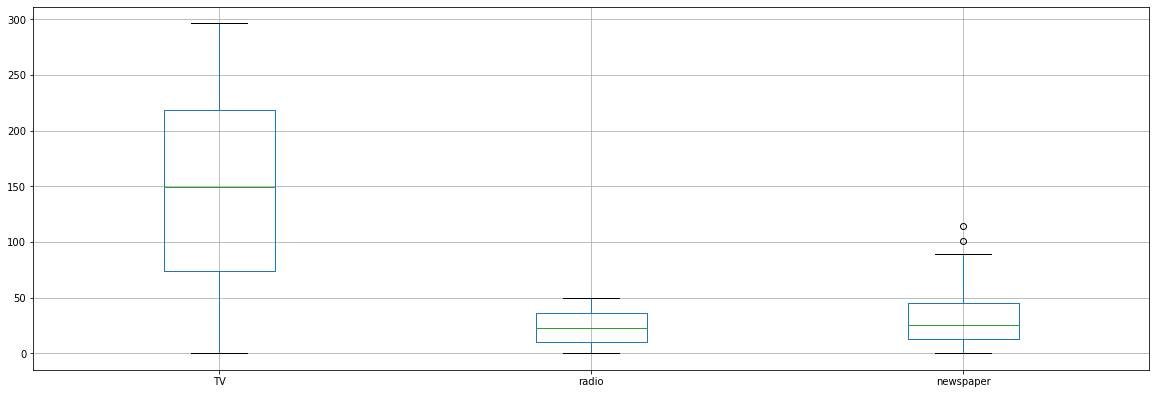

In [33]:
#Plotting Boxplot to understand outlier

x.boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [35]:
import numpy as np

In [36]:
q1=x.quantile(0.25)

#3rd quantile

q3=x.quantile(0.75)

# IQR

iqr=q3-q1

In [37]:
index=np.where(x['newspaper']>(q3.newspaper +(1.5*iqr.newspaper)))
x=x.drop(x.index[index])
x.reset_index()

,index,TV,radio,newspaper
0,0,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,2,17.2,45.9,69.3
3,3,151.5,41.3,58.5
4,4,180.8,10.8,58.4
...,...,...,...,...
193,195,38.2,3.7,13.8
194,196,94.2,4.9,8.1
195,197,177.0,9.3,6.4
196,198,283.6,42.0,66.2


In [39]:
# Data loss

((200-198)/200)*100

#1% data loss which is acceptable range

1.0

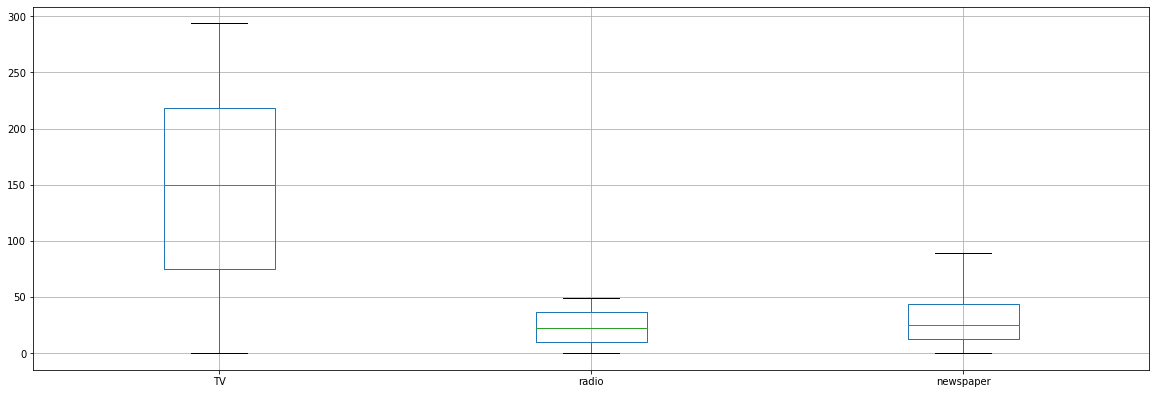

In [40]:
# checking box plot to see outlier 
x.boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [41]:
# Now data distribution is looking better 

C:\Users\sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


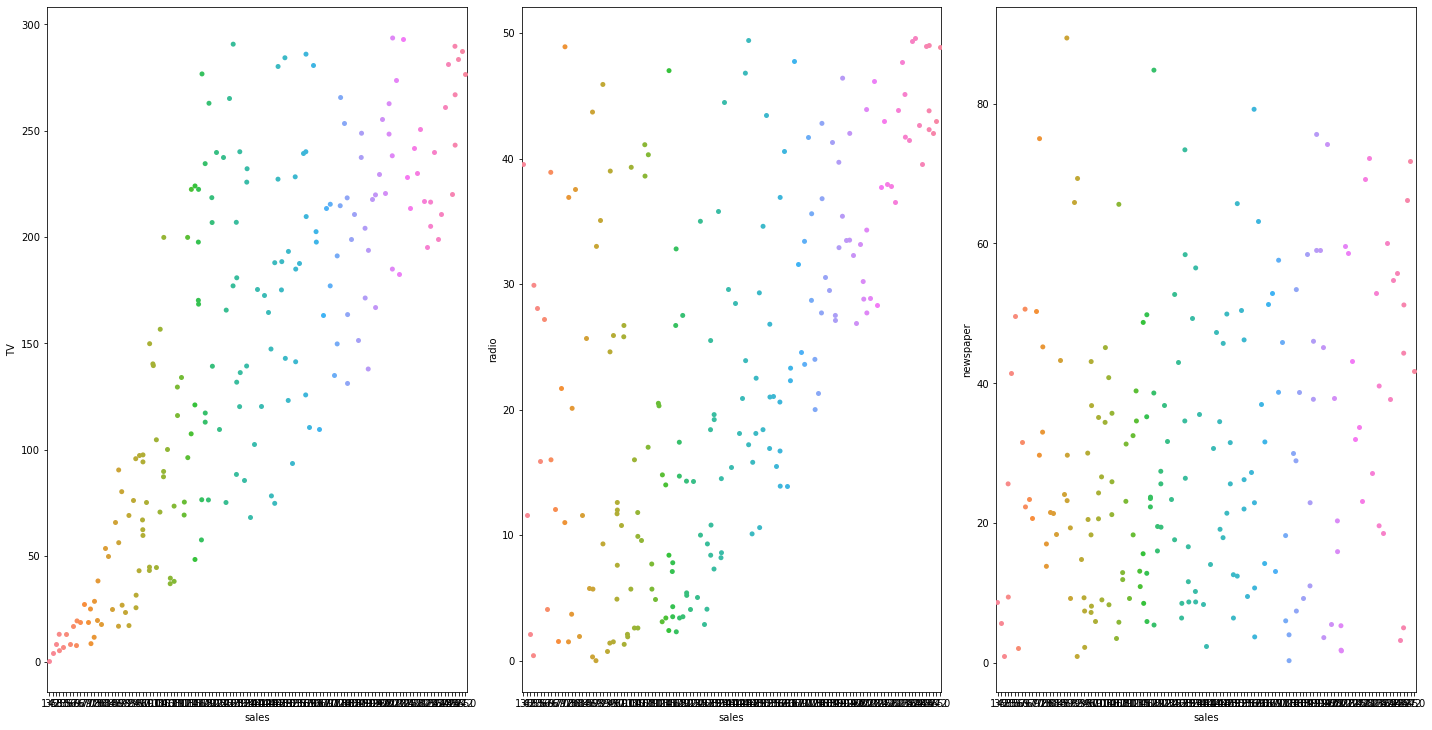

In [42]:
# Analysing relation between each feature and label
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [ ]:
# it seems newspaper add is not effective

In [ ]:
#checking skewness of data

In [53]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [54]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [56]:
df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

In [ ]:
#Skewness removed 

In [58]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
df_new=sc.fit_transform(df_new)
df_new

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [59]:
from sklearn.model_selection import train_test_split
X_max_train,X_max_test,y_max_train,y_max_test =train_test_split(df_new,y,test_size=.30,random_state=42)

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [65]:
reg_max = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_max.fit(X_max_train, y_max_train)

reg_min = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
#reg_min.fit(X_min_train, y_min_train)

#cv_results_min = cross_validate(reg_min, X_min_train, y_min_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)
cv_results_max = cross_validate(reg_max, X_max_train, y_max_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)

#print('Next_Tmin :')
#print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
#print('Test r2 :' , cv_results_min['test_r2'].mean())
#print("Train RMSE :" , -cv_results_min['train_neg_root_mean_squared_error'].mean())
#print("Train r2 :" , cv_results_min['train_r2'].mean())
print("*------------------------------------------*")
print('Sales :')
print('Test RMSE :' , -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_max['test_r2'].mean())
print("Train RMSE :" , -cv_results_max['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_max['train_r2'].mean())

*------------------------------------------*
Sales :
Test RMSE : 1.6162166459550786
Test r2 : 0.8917465785053269
Train RMSE : 1.532422058120312
Train r2 : 0.9100673888838766


In [67]:
Sales_predict = reg_max.predict(X_max_test)

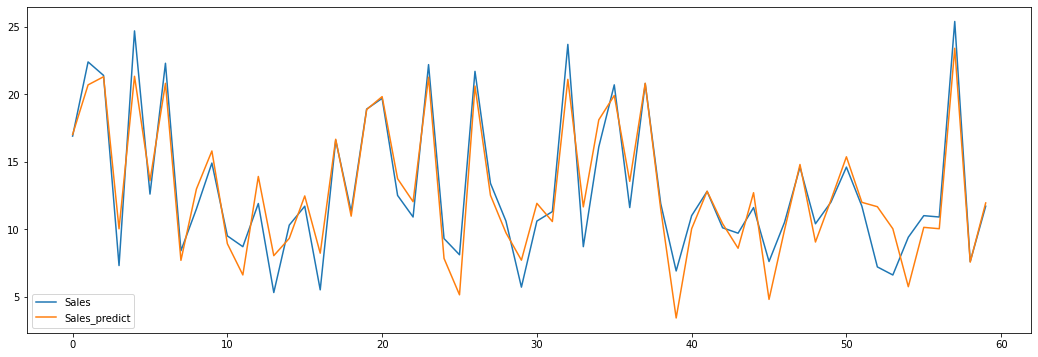

In [68]:
plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="Sales")
plt.plot(Sales_predict,label="Sales_predict")
plt.legend()
plt.show()

In [ ]:
#It seems predict is good with actual values

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 130],
    'max_features': [3, 6],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [4, 8],
    'n_estimators': [1000, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [70]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [71]:
# Fit the grid search to the Max data

grid_search.fit(X_max_train, y_max_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_max_test, y_max_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   38.4s finished


{'bootstrap': True, 'max_depth': 130, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1000}
Model Performance
Average Error: 0.5768 degrees.
Accuracy = 94.81%.


In [79]:
Next_Tmax_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=130, max_features=3, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=1000)
#Next_Tmin_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                               # bootstrap=True, max_depth=70, max_features=6, 
                                               # min_samples_leaf=2, min_samples_split=4, n_estimators=900)


print("---Next_Tmax---")
Next_Tmax_TreeRegressor.fit(X_max_train,y_max_train)
Next_Tmax_Accuracy = evaluate(Next_Tmax_TreeRegressor, X_max_test, y_max_test)

base_max_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_max_model.fit(X_max_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, X_max_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmax_Accuracy - base_max_accuracy) / base_max_accuracy))
print("---------")





---Next_Tmax---
Model Performance
Average Error: 0.5875 degrees.
Accuracy = 94.67%.
Model Performance
Average Error: 0.5393 degrees.
Accuracy = 95.27%.
Improvement of -0.64%.
---------


In [86]:
Next_Tmin_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=70, max_features=4, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=1000)
print("---Sales---")
Next_Tmax_TreeRegressor.fit(X_max_train,y_max_train)
Next_Tmax_Accuracy = evaluate(Next_Tmax_TreeRegressor, X_max_test, y_max_test)

base_max_model = RandomForestRegressor(n_estimators = 10000, random_state = 42)
base_max_model.fit(X_max_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, X_max_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmax_Accuracy - base_max_accuracy) / base_max_accuracy))
print("---------")

---Sales---
Model Performance
Average Error: 0.5875 degrees.
Accuracy = 94.67%.
Model Performance
Average Error: 0.5673 degrees.
Accuracy = 94.85%.
Improvement of -0.19%.
---------


In [87]:
import pickle
filename='inhouse_diabetes.pkl'
pickle.dump(rf,open(filename,'wb'))